In [74]:
import pandas as pd

In [76]:
df=pd.read_csv('updated_stud_data.csv')

In [77]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [81]:
x=df.drop(columns=['math_score'],axis=1)

In [82]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [83]:
y=df['math_score']

In [85]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [91]:
num_features=x.select_dtypes(exclude='object').columns
print("numerical features:",num_features)
cat_features=x.select_dtypes(include='object').columns
print('categorical features:',cat_features)

numerical features: Index(['reading_score', 'writing_score', 'total_score', 'average'], dtype='object')
categorical features: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [94]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer=OneHotEncoder()
sc_transformer=StandardScaler()

preprocessor=ColumnTransformer(
    [
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",sc_transformer,num_features)
    ]
)



In [96]:
x=preprocessor.fit_transform(x)

In [128]:
print(x.shape)
print(y.shape)

(1000, 21)
(1000,)


#train test split

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 21), (200, 21))

#create Evaluate function after model training it gives all metrices

In [137]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
def evaluate_model(true,predicated):
    mae=mean_absolute_error(true,predicated),
    mse=mean_squared_error(true,predicated),
    rmse=np.sqrt(mse)
    r2_score_val=r2_score(true,predicated)
    return mae,rmse,r2_score_val

In [138]:
#import all models libraries


In [160]:
!pip install xgboost


In [161]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor


In [164]:
models={
"linear":LinearRegression(),
"lasso":Lasso(),
"ridge":Ridge(),
"kneigbor":KNeighborsRegressor(),
"decisiontree":DecisionTreeRegressor(),
"randomforest":RandomForestRegressor(),
"adaboost":AdaBoostRegressor(),
"xgboost":XGBRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    #train model
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae,test_rmse,test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    
    print("- Root Mean Squared Error: {}".format(model_train_rmse))
    print("- Mean Absolute Error: {}".format(model_train_mae))
    print("- R2 Score: {}".format(model_train_r2))

    print("\n")
    print('Model performance for Testing set')
    
    print("- Root Mean Squared Error: {}".format(test_rmse))
    print("- Mean Absolute Error: {}".format(test_mae))
    print("- R2 Score: {}".format(test_r2))

    r2_list.append(test_r2)
    print("-----"*20)
    print("\n")



linear
Model performance for Training set
- Root Mean Squared Error: [1.68559136e-13]
- Mean Absolute Error: (1.3595347070349816e-13,)
- R2 Score: 1.0


Model performance for Testing set
- Root Mean Squared Error: [1.71957214e-13]
- Mean Absolute Error: (1.368505309073953e-13,)
- R2 Score: 1.0
----------------------------------------------------------------------------------------------------


lasso
Model performance for Training set
- Root Mean Squared Error: [4.73805881]
- Mean Absolute Error: (3.743856971975057,)
- R2 Score: 0.9004238119887846


Model performance for Testing set
- Root Mean Squared Error: [4.71707467]
- Mean Absolute Error: (3.7578731421148293,)
- R2 Score: 0.9085602868908693
----------------------------------------------------------------------------------------------------


ridge
Model performance for Training set
- Root Mean Squared Error: [0.33960006]
- Mean Absolute Error: (0.2724414942038571,)
- R2 Score: 0.9994884476076247


Model performance for Testing se

In [168]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,linear,1.000000
2,ridge,0.999516
7,xgboost,0.977101
5,randomforest,0.963715
4,decisiontree,0.935173
6,adaboost,0.927317
1,lasso,0.908560
3,kneigbor,0.889781


In [170]:
linear=LinearRegression(fit_intercept=True)
linear=linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)

Text(0, 0.5, 'predicted')

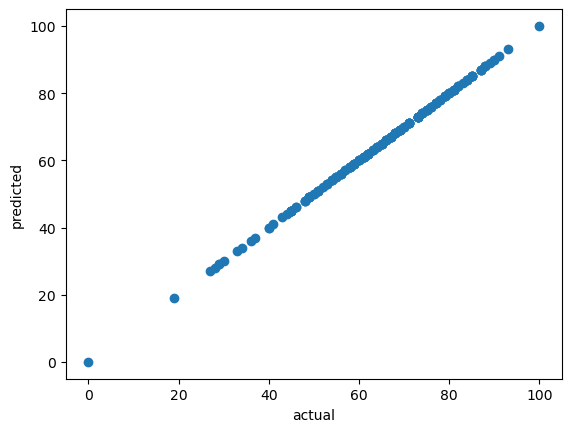

In [171]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')